# Problem 1

Do all the exercises from the Module 1 lecture notes.

# Problem 2

Consider 3 tensors, A, B, and C, of different ranks. Suppose A is of rank 6, and B and C are rank 3. All the let all the dimensions be $d = 5$.

Draw the tensor network diagrams corresponding to the following operations, and figure out the rank of the resulting tensors:

a) Contracting the first and third legs of A.

b) Contracting third leg of A with first leg of B

Now, use numpy package to define random tensors with the rank and dimension of A, B, and C (see code below). Draw the corresponding tensor network diagram of the equation in the code.

Next, write code to implement the operations (a) and (b) above.




In [ ]:
import numpy as np

# Initialize variables
np.random.seed(42)  # For reproducibility (optional)
α = np.random.randn()
A = np.random.randn(5, 5, 5, 5, 5, 5)
B = np.random.randn(5, 5, 5)
C = np.random.randn(5, 5, 5)
D = np.zeros((5, 5, 5))

# Tensor operations using Einstein summation
# D[a, b, c] = A[a, e, f, c, f, g] * B[g, b, e] + α * C[c, a, b]
D = np.einsum('aefcfg,gbe->abc', A, B) + α * np.einsum('cab->abc', C)

print(f"α = {α}")
print(f"D shape: {D.shape}")
print(D)

α = 0.4967141530112327
D shape: (5, 5, 5)
[[[-26.93795882  -4.57805153 -13.09816712  17.2661355    9.46342208]
  [ 16.94844746   7.50300088   3.22487084   8.21060179 -18.99770395]
  [ -0.38551874   2.30477995  16.90511873 -10.25788574  17.46026317]
  [ -5.72484452   0.66975091 -12.36227198  -1.23793125  11.41146504]
  [-11.42826404  -7.88553082  -6.09511334   0.63621911  16.04934158]]

 [[ 30.30119454   9.22612444  10.60660293  24.38192858  -1.86133044]
  [ 15.44115899   5.74845983 -12.95196612 -16.94866238  -5.45015979]
  [-14.87278205  11.18837441  14.18374265   5.2609176  -10.98809872]
  [  0.68477896   5.05136552  -6.98402441   8.20125939 -17.02966358]
  [ 15.6973232   -6.82577953  17.07155566  -9.72921343 -16.64972559]]

 [[ 22.80209175  -3.55206678   5.63729434  -4.73133139   9.61900565]
  [-19.56907346  -7.60611107   2.46180925 -11.48493494   8.09772809]
  [  8.80797885 -10.00430952   5.80224178   5.78820314  -4.94936121]
  [ -7.46998302  -1.9341356   -4.4767341    8.41516218 -1

# Problem 3

Interpret the Bell state $(|00\rangle + |11 \rangle)/ \sqrt{2}$ on two qubits as a matrix. Perform the Singular Value Decomposition of this matrix to compute the entanglement between the qubits.


Now, interpret the following code and see how this performs the same computation numerically.

In [ ]:
import numpy as np

# Define the Bell state as a 4 dimensional vector
Bell = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

# Reshape the 4 dimensional vector as a 2x2 dimensional matrix
Bell_mat = Bell.reshape(2, 2)

# Compute SVD
U, singular_values, Vh = np.linalg.svd(Bell_mat)

# Filter out near-zero singular values
tolerance = 1e-10
significant_sv = singular_values[singular_values > tolerance]

# Schmidt rank (number of non-zero singular values)
schmidt_rank = len(significant_sv)

# Compute entanglement entropy using von Neumann entropy
# S = -Σ λᵢ log₂(λᵢ) where λᵢ = σᵢ² (squared singular values)
lambda_i = significant_sv ** 2
entanglement_entropy = -np.sum(lambda_i * np.log2(lambda_i + 1e-16))  # Small epsilon to avoid log(0)


# Problem 4 (Demo)

The fact that SVD can compress matrix has a nice application: image compression! The following demo allows you to download an image and compress the file using SVD.

SVD Image Compression Demonstration
Loading image...
Original image shape: (167, 301)
Original image size: 50267 pixels

Analyzing singular values...


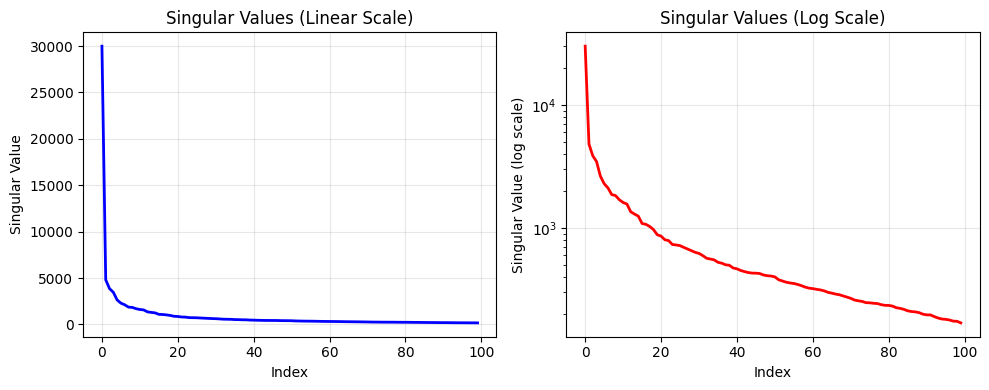


Compressing with k=4 singular values...
  Compression ratio: 26.79x
  MSE: 1118.37
  PSNR: 17.64 dB

Compressing with k=16 singular values...
  Compression ratio: 6.70x
  MSE: 365.23
  PSNR: 22.51 dB

Compressing with k=128 singular values...
  Compression ratio: 0.84x
  MSE: 2.66
  PSNR: 43.88 dB


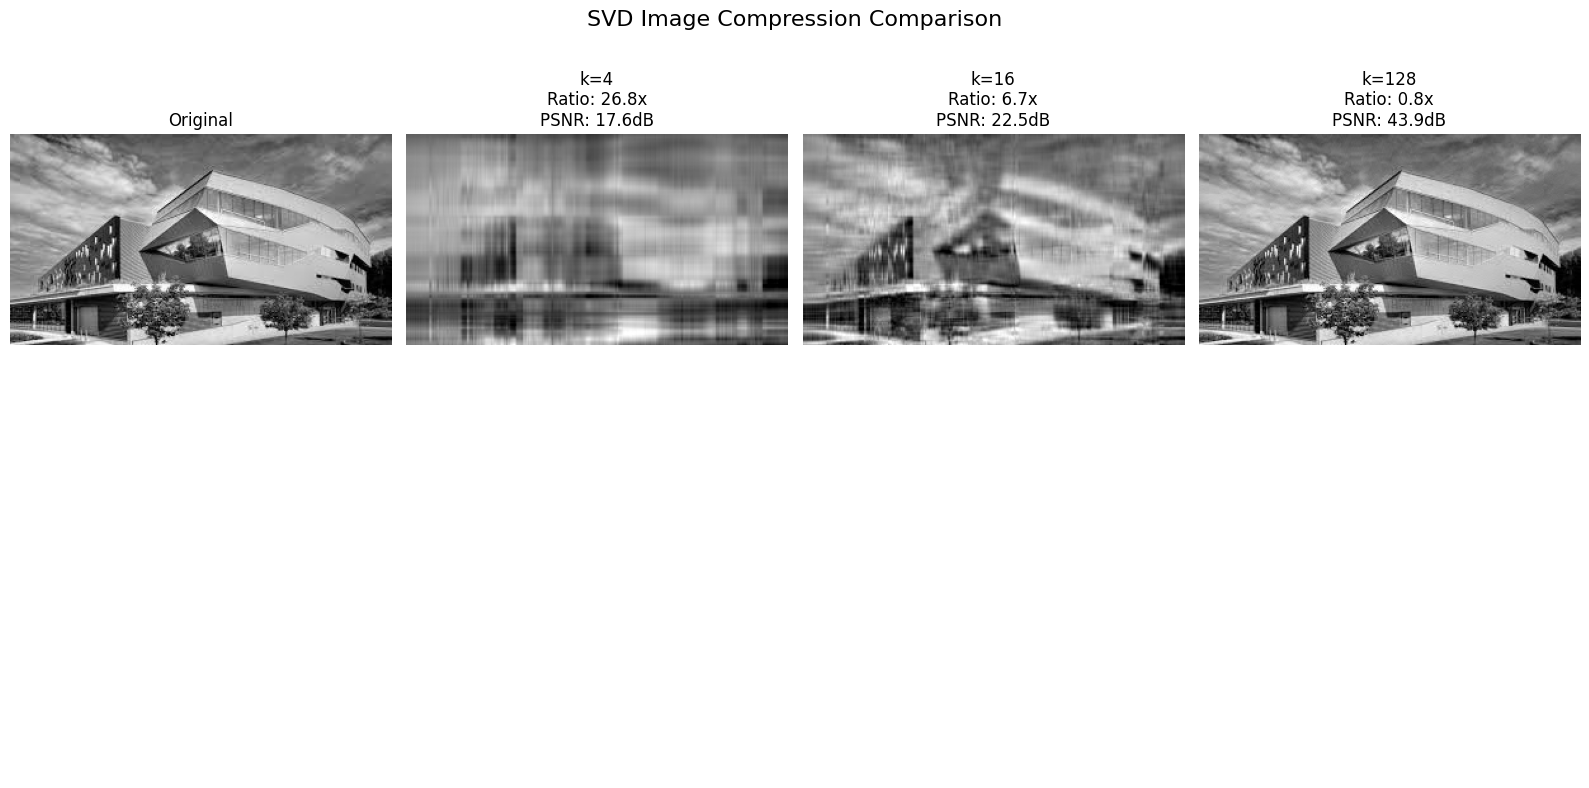

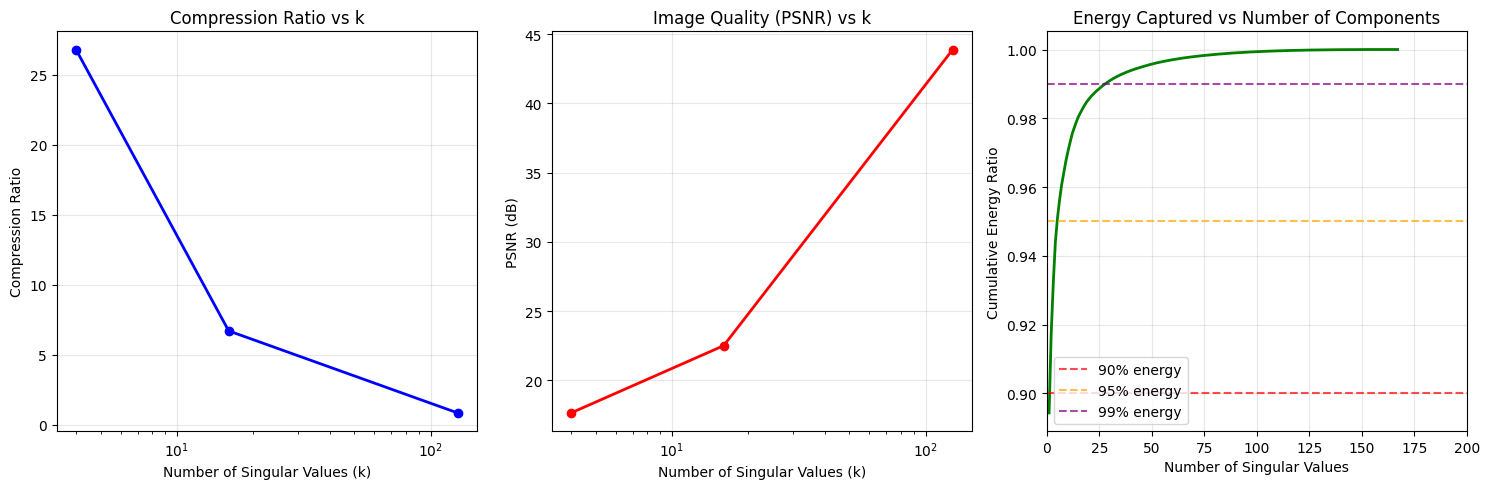

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def download_sample_image():
    """Download a sample image for demonstration."""
    # try:
    # Download a sample image (Perimeter Institute building)
    url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6LnnWWDfP9x5zzCJIRlqISj6o6BOKHVr3ZQ&s"
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    return np.array(img.convert('L'))  # Convert to grayscale
    # except:
    #     # If download fails, create a synthetic image
    #     print("Creating synthetic image...")
    #     x, y = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
    #     img = 255 * (np.sin(x) * np.cos(y) + 1) / 2
    #     return img.astype(np.uint8)

def svd_compress_image(image, k):
    """
    Compress an image using SVD by keeping only the top k singular values.

    Parameters:
    image: numpy array, grayscale image
    k: int, number of singular values to keep

    Returns:
    compressed_image: numpy array, compressed image
    compression_ratio: float, compression ratio achieved
    """
    # Perform SVD
    U, s, Vt = np.linalg.svd(image, full_matrices=False)

    # Keep only top k singular values
    U_k = U[:, :k]
    s_k = s[:k]
    Vt_k = Vt[:k, :]

    # Reconstruct image
    compressed_image = U_k @ np.diag(s_k) @ Vt_k

    # Ensure pixel values are in valid range
    compressed_image = np.clip(compressed_image, 0, 255)

    # Calculate compression ratio
    original_size = image.size
    compressed_size = U_k.size + s_k.size + Vt_k.size
    compression_ratio = original_size / compressed_size

    return compressed_image, compression_ratio

def plot_singular_values(image, max_sv=100):
    """Plot the singular values to show their decay."""
    U, s, Vt = np.linalg.svd(image, full_matrices=False)

    plt.figure(figsize=(10, 4))

    # Plot first max_sv singular values
    plt.subplot(1, 2, 1)
    plt.plot(s[:max_sv], 'b-', linewidth=2)
    plt.xlabel('Index')
    plt.ylabel('Singular Value')
    plt.title('Singular Values (Linear Scale)')
    plt.grid(True, alpha=0.3)

    # Plot in log scale
    plt.subplot(1, 2, 2)
    plt.semilogy(s[:max_sv], 'r-', linewidth=2)
    plt.xlabel('Index')
    plt.ylabel('Singular Value (log scale)')
    plt.title('Singular Values (Log Scale)')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return s

def demonstrate_compression():
    """Main demonstration function."""
    print("SVD Image Compression Demonstration")
    print("=" * 40)

    # Load image
    print("Loading image...")
    image = download_sample_image()
    print(f"Original image shape: {image.shape}")
    print(f"Original image size: {image.size} pixels")

    # Plot singular values
    print("\nAnalyzing singular values...")
    singular_values = plot_singular_values(image)

    # Define compression levels
    k_values = [4,16,128]

    # Create comparison plot
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    fig.suptitle('SVD Image Compression Comparison', fontsize=16)

    # Show original image
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original')
    axes[0, 0].axis('off')

    # Show compressed versions
    compression_data = []

    for i, k in enumerate(k_values):
        if i >= 7:  # Skip if too many subplots
            break

        print(f"\nCompressing with k={k} singular values...")
        compressed_img, comp_ratio = svd_compress_image(image, k)

        # Calculate error metrics
        mse = np.mean((image - compressed_img) ** 2)
        psnr = 20 * np.log10(255 / np.sqrt(mse)) if mse > 0 else float('inf')

        compression_data.append({
            'k': k,
            'compression_ratio': comp_ratio,
            'mse': mse,
            'psnr': psnr
        })

        # Plot compressed image
        row = (i + 1) // 4
        col = (i + 1) % 4

        axes[row, col].imshow(compressed_img, cmap='gray')
        axes[row, col].set_title(f'k={k}\nRatio: {comp_ratio:.1f}x\nPSNR: {psnr:.1f}dB')
        axes[row, col].axis('off')

        print(f"  Compression ratio: {comp_ratio:.2f}x")
        print(f"  MSE: {mse:.2f}")
        print(f"  PSNR: {psnr:.2f} dB")

    # Hide unused subplots
    for i in range(len(k_values) + 1, 8):
        row = i // 4
        col = i % 4
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

    # Plot compression analysis
    plot_compression_analysis(compression_data, singular_values)

    return compression_data

def plot_compression_analysis(compression_data, singular_values):
    """Plot compression ratio vs quality metrics."""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    k_vals = [d['k'] for d in compression_data]
    ratios = [d['compression_ratio'] for d in compression_data]
    psnrs = [d['psnr'] for d in compression_data]

    # Plot 1: Compression ratio vs k
    axes[0].plot(k_vals, ratios, 'bo-', linewidth=2, markersize=6)
    axes[0].set_xlabel('Number of Singular Values (k)')
    axes[0].set_ylabel('Compression Ratio')
    axes[0].set_title('Compression Ratio vs k')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xscale('log')

    # Plot 2: PSNR vs k
    axes[1].plot(k_vals, psnrs, 'ro-', linewidth=2, markersize=6)
    axes[1].set_xlabel('Number of Singular Values (k)')
    axes[1].set_ylabel('PSNR (dB)')
    axes[1].set_title('Image Quality (PSNR) vs k')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xscale('log')

    # Plot 3: Energy captured by top k singular values
    cumulative_energy = np.cumsum(singular_values**2)
    total_energy = cumulative_energy[-1]
    energy_ratio = cumulative_energy / total_energy

    axes[2].plot(range(1, len(energy_ratio) + 1), energy_ratio[:len(energy_ratio)], 'g-', linewidth=2)
    axes[2].axhline(y=0.9, color='r', linestyle='--', alpha=0.7, label='90% energy')
    axes[2].axhline(y=0.95, color='orange', linestyle='--', alpha=0.7, label='95% energy')
    axes[2].axhline(y=0.99, color='purple', linestyle='--', alpha=0.7, label='99% energy')
    axes[2].set_xlabel('Number of Singular Values')
    axes[2].set_ylabel('Cumulative Energy Ratio')
    axes[2].set_title('Energy Captured vs Number of Components')
    axes[2].grid(True, alpha=0.3)
    axes[2].legend()
    axes[2].set_xlim(0, 200)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Run main demonstration
    compression_data = demonstrate_compression()
